Please check the README file


Selected feature that I found withing interset to predict the number of cigarette per : the accuracy was low, so boosting was used to improve the accuracy of the model; however the model is highly overfitting, even after PCA was used.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = "2024_PersonalityTraits_SurveyData.xls"
data = pd.read_excel(file_path)

# Feature selection
selected_features = [
    "Gender:",  # Gender
    "How old are you?",  # Age
    "How soon after you wake up do you smoke your first cigarette?",  # First cigarette timing
    "How often do you exercise?",  # Exercise frequency
    "How often do you feel stressed?",  # Stress frequency
    "On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",  # Social media usage
    "Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?"  # Smoker friends
]

target_col = "How many cigarettes do you smoke each day?"

# Handle missing values
data = data.dropna(subset=selected_features + [target_col])

# Encode the target column
target_mapping = {
    "10 or less cigarettes/day": 0,
    "11 to 20 cigarettes": 1,
    "21 to 30 cigarettes": 2,
    "31 cigarettes/day or more": 3
}
data["cig_category"] = data[target_col].replace(target_mapping)

# Encode categorical features
categorical_features = [
    "Gender:",
    "How soon after you wake up do you smoke your first cigarette?",
    "How often do you exercise?",
    "How often do you feel stressed?",
    "On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?"
]
encoder = LabelEncoder()
for col in categorical_features:
    data[col] = encoder.fit_transform(data[col])

# Normalize numerical features
numerical_features = [
    "How old are you?",
    "Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?"
]
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Prepare data for modeling
X = data[selected_features]
y = data["cig_category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


C:\Users\Roni\AppData\Local\Temp\ipykernel_15480\925092448.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["cig_category"] = data[target_col].replace(target_mapping)


Confusion Matrix:
[[12  4  0  0]
 [ 2  8  2  0]
 [ 4  4  2  1]
 [ 0  1  2  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.47      0.67      0.55        12
           2       0.33      0.18      0.24        11
           3       0.50      0.25      0.33         4

    accuracy                           0.53        43
   macro avg       0.49      0.46      0.46        43
weighted avg       0.51      0.53      0.51        43


Feature Importance:
How old are you?                                                                                                                                    0.219142
Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?                             0.176923
How soon after you wake up do you smoke your first cigarette?                                                                  

The initial model with selected features had low accuracy, and boosting was used to improve accuracy, but the model is highly overfitting.

Confusion Matrix (Test Set):
[[10  2  2  0]
 [ 3  7  1  2]
 [ 2  0  7  1]
 [ 0  1  1 11]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.70      0.54      0.61        13
           2       0.64      0.70      0.67        10
           3       0.79      0.85      0.81        13

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.69        50
weighted avg       0.70      0.70      0.70        50

Training Accuracy: 0.99
Test Accuracy: 0.70
Training Error: 0.01
Test Error: 0.30


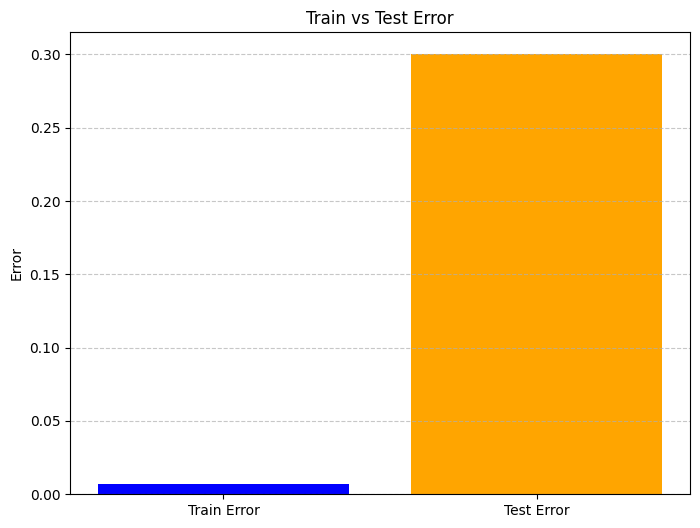

In [29]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Oversample using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)

# Evaluation
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Calculate Train and Test Errors
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Print Train vs Test Errors
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

# Plot Train vs Test Errors
plt.figure(figsize=(8, 6))
plt.bar(['Train Error', 'Test Error'], [train_error, test_error], color=['blue', 'orange'])
plt.title('Train vs Test Error')
plt.ylabel('Error')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Now we will try to improve by using PCA to reduce the number of features

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load the dataset
file_path = "2024_PersonalityTraits_SurveyData.xls"
data = pd.read_excel(file_path)

# Map 'How many cigarettes do you smoke each day?' to 'cig_category'
target_mapping = {
    "10 or less cigarettes/day": 0,
    "11 to 20 cigarettes": 1,
    "21 to 30 cigarettes": 2,
    "31 cigarettes/day or more": 3
}
data['cig_category'] = data['How many cigarettes do you smoke each day?'].replace(target_mapping)

# Define features and target
features = [
    'Gender:', 
    'How old are you?', 
    'How often do you feel stressed?', 
    'How often do you exercise?', 
    'On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?',
    'Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?'
]
target = 'cig_category'

# Preprocess data
X = data[features]
y = data[target]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical data
X = StandardScaler().fit_transform(X)  # Standardize

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a model using PCA-transformed features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_pca)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Explained variance
print("Explained variance by components:", pca.explained_variance_ratio_)
from sklearn.metrics import accuracy_score

# Train accuracy
train_accuracy = accuracy_score(y_train, clf.predict(X_train_pca))
print("Train Accuracy:", train_accuracy)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Compare the metrics
if train_accuracy > test_accuracy + 0.10:  # Large gap between train and test
    print("Your model is likely overfitting.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:  # Both are low
    print("Your model is likely underfitting.")
else:
    print("Your model is likely balanced.")


Confusion Matrix:
[[13  2  1  0]
 [ 5  6  1  0]
 [ 6  2  3  0]
 [ 2  0  1  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.81      0.62        16
           1       0.60      0.50      0.55        12
           2       0.50      0.27      0.35        11
           3       1.00      0.25      0.40         4

    accuracy                           0.53        43
   macro avg       0.65      0.46      0.48        43
weighted avg       0.57      0.53      0.51        43

Explained variance by components: [0.15429516 0.11875502 0.113235  ]
Train Accuracy: 0.9704142011834319
Test Accuracy: 0.5348837209302325
Your model is likely overfitting.


C:\Users\Roni\AppData\Local\Temp\ipykernel_15480\3189351057.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['cig_category'] = data['How many cigarettes do you smoke each day?'].replace(target_mapping)


Model still overfitting, we will try some finetuning of the model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Retain top 10 components

# Create a pipeline with scaling, PCA, and Random Forest with regularization
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('clf', RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=10))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_split': [2, 5, 10],
    'clf__n_estimators': [50, 100, 200]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nBest Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nBest Model Classification Report:\n", classification_report(y_test, y_pred_best))


Confusion Matrix:
 [[13  2  1  0]
 [ 6  5  1  0]
 [ 7  2  2  0]
 [ 4  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.81      0.57        16
           1       0.56      0.42      0.48        12
           2       0.50      0.18      0.27        11
           3       0.00      0.00      0.00         4

    accuracy                           0.47        43
   macro avg       0.37      0.35      0.33        43
weighted avg       0.44      0.47      0.41        43

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=50; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=50; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=50; total time=   0.0s


C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=50; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=50; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=100; total time=   0.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=200; total time=   0.1s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=200; total time=   0.2s
[CV] END clf__max_depth=3, clf__min_samples_split=2, clf__n_estimators=200; total time=   0.1s
[CV] END clf__max_depth=3, clf__min_samples_split=2,

C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Predict on both training and testing sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.1:
    print("The model is overfitting. Consider regularization or simpler models.")
elif test_accuracy > train_accuracy + 0.1:
    print("The model is underfitting. Consider a more complex model or additional features.")
else:
    print("The model has a good balance between training and testing performance.")

# Detailed performance comparison
print("\nClassification Report for Training Data:\n", classification_report(y_train, y_train_pred))
print("\nClassification Report for Test Data:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.6509
Testing Accuracy: 0.4651
The model is overfitting. Consider regularization or simpler models.

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.63      0.91      0.75        66
           1       0.78      0.55      0.64        51
           2       0.53      0.52      0.52        31
           3       0.75      0.29      0.41        21

    accuracy                           0.65       169
   macro avg       0.67      0.56      0.58       169
weighted avg       0.67      0.65      0.63       169


Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.43      0.81      0.57        16
           1       0.56      0.42      0.48        12
           2       0.50      0.18      0.27        11
           3       0.00      0.00      0.00         4

    accuracy                           0.47        43
   macro avg       0.37      0.35    

C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",